# Final Notebook 002 - Data Analysis

## Import

In [1]:
import sentisignal
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import pylab as P 
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import scipy.stats as s
import statsmodels.api as sm
import pprint
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from datetime import datetime
from yahoo_finance import Share
from pandas_datareader import data, wb
from statsmodels.graphics.api import qqplot
from operator import itemgetter
from decimal import *
from sklearn.neighbors.kde import KernelDensity

# plt.style.use('ggplot')
# sns.set_style("darkgrid")
# sns.set_context("notebook")

## Configuration

In [3]:
data_primary_path = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology_path = '../../data/csv/symbology.csv'
data_pickles_path = '../../data/pickles/'
data_nasdaq_company_list_path = '../../data/nasdaq/companylist.csv'
start_date = '2012-01-01'
end_date = '2016-01-01'

## Reload Data

In [4]:
data_symbology = pd.read_csv(data_symbology_path)

### Use NASDAQ data to get top 100 companies by MarketCap

In [5]:
data_nasdaq_company_list = pd.read_csv(data_nasdaq_company_list_path)
data_nasdaq_top_100_mkt_cap = data_nasdaq_company_list.head(100)
data_nasdaq_top_100_mkt_cap_symbols = data_nasdaq_top_100_mkt_cap['Symbol'].unique()

### Load results from intermediate pickle

In [6]:
data_nasdaq_top_100_preprocessed_merge = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_100_preprocessed_merge_'+start_date+'_'+end_date)

### Load window results from intermediate pickle

In [7]:
data_nasdaq_top_100_preprocessed_merge_window_30 = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_100_preprocessed_merge_'+start_date+'_'+end_date+'_window_30')

## Data Analytics (No window)

### MI (Mutual Information)

In [ ]:
# def shift
# data_nasdaq_top_100_preprocessed_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, True)
# def shift (validate)
# data_nasdaq_top_100_preprocessed_mi_res_validate = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, False)

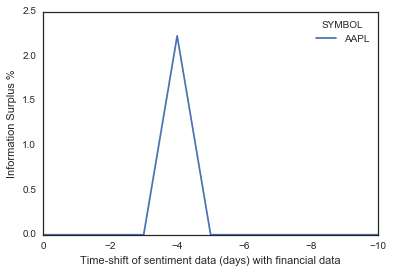

In [30]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [26]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net.head()

INFORMATION_SURPLUS_DIFF  INFORMATION_SURPLUS_PCT  \
SYMBOL                                                        
AAL    0                  0.000000                        0   
       1                 -0.030780                        0   
       2                 -0.016835                        0   
       3                 -0.027330                        0   
       4                 -0.004818                        0   

          MUTUAL INFORMATION  SHIFT  
SYMBOL                               
AAL    0            0.315717      0  
       1            0.284937     -1  
       2            0.298882     -2  
       3            0.288387     -3  
       4            0.310899     -4

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'RTISf', 'VOLUME', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'VOLATILITY', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

### PMI (Pointwise Mutual Information)
#### Form a time series of mutual information values from single events per company

In [ ]:
# pmi_func(data_nasdaq_top_100_preprocessed_merge, 'PCA_SENTIMENT', 'PCA_FINANCE')
sentisignal.kernel_pmi_func(data_nasdaq_top_100_preprocessed_merge, 'PCA_SENTIMENT', 'PCA_FINANCE', 1.0, 0)

plt.plot(data_nasdaq_top_100_preprocessed_merge['PMI_0'])
plt.show()

In [ ]:
data_nasdaq_top_100_preprocessed_merge.info()

In [35]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.net_daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE')

SOURCE SYMBOL         TIMESTAMP_UTC  \
SYMBOL                                                                   
AAL    0  stocktwits+twitter_withretweets    AAL  2012-01-05T05:00:00Z   
       1  stocktwits+twitter_withretweets    AAL  2012-01-06T05:00:00Z   
       2  stocktwits+twitter_withretweets    AAL  2012-01-09T05:00:00Z   
       3  stocktwits+twitter_withretweets    AAL  2012-01-10T05:00:00Z   
       4  stocktwits+twitter_withretweets    AAL  2012-01-11T05:00:00Z   

          BULLISH_INTENSITY  BEARISH_INTENSITY  BULL_MINUS_BEAR  \
SYMBOL                                                            
AAL    0                0.0                  0              0.0   
       1                0.0                  0              0.0   
       2                0.0                  0              0.0   
       3                2.2                  0              2.2   
       4                0.0                  0              0.0   

          BULL_SCORED_MESSAGES  BEAR_SCORED_MESSAGES  BULL_BEAR_MSG_RATIO  \
SYMBOL                                                                      
AAL    0                     0                     0                    0   
       1                     0                     0                    0   
       2                     0                     0                    0   
       3                     1                     0                    0   
       4                     0                     0                    0   

          TOTAL_SCANNED_MESSAGES    ...        PMI_-1 pmi_is_-1    PMI_-2  \
SYMBOL                              ...                                     
AAL    0                       2    ...      2.199384         0  2.219785   
       1                       3    ...      2.219099         0  2.295139   
       2                       1    ...      2.287471         0  2.284786   
       3                       1    ...      2.284515         0  2.295139   
       4                       1    ...      2.287471         0  2.284786   

         pmi_is_-2 shift_PCA_SENTIMENT_1  shift_PCA_SENTIMENT_2     PMI_1  \
SYMBOL                                                                      
AAL    0 -9.510937            -62.202768             -60.638367  2.394260   
       1  4.616209            -60.167295             -62.202768  2.441530   
       2  3.110722            -59.350832             -60.167295  2.187820   
       3  0.802490            -62.598267             -59.350832  2.207310   
       4  0.089428            -61.232706             -62.598267  2.275539   

           pmi_is_1     PMI_2   pmi_is_2  
SYMBOL                                    
AAL    0  -2.398485  2.266156  -7.620619  
       1  11.288971  2.389095   8.898896  
       2  -1.265298  2.439710  10.102327  
       3  -3.054961  2.179765  -4.264720  
       4  -0.315642  2.201513  -3.558506  

[5 rows x 49 columns]

In [36]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi.head(50)

SOURCE SYMBOL         TIMESTAMP_UTC  \
SYMBOL                                                                    
AAL    0   stocktwits+twitter_withretweets    AAL  2012-01-05T05:00:00Z   
       1   stocktwits+twitter_withretweets    AAL  2012-01-06T05:00:00Z   
       2   stocktwits+twitter_withretweets    AAL  2012-01-09T05:00:00Z   
       3   stocktwits+twitter_withretweets    AAL  2012-01-10T05:00:00Z   
       4   stocktwits+twitter_withretweets    AAL  2012-01-11T05:00:00Z   
       5   stocktwits+twitter_withretweets    AAL  2012-01-12T05:00:00Z   
       6   stocktwits+twitter_withretweets    AAL  2012-01-13T05:00:00Z   
       7   stocktwits+twitter_withretweets    AAL  2012-01-17T05:00:00Z   
       8   stocktwits+twitter_withretweets    AAL  2012-01-18T05:00:00Z   
       9   stocktwits+twitter_withretweets    AAL  2012-01-19T05:00:00Z   
       10  stocktwits+twitter_withretweets    AAL  2012-01-23T05:00:00Z   
       11  stocktwits+twitter_withretweets    AAL  2012-01-25T05:00:00Z   
       12  stocktwits+twitter_withretweets    AAL  2012-01-26T05:00:00Z   
       13  stocktwits+twitter_withretweets    AAL  2012-01-27T05:00:00Z   
       14  stocktwits+twitter_withretweets    AAL  2012-01-30T05:00:00Z   
       15  stocktwits+twitter_withretweets    AAL  2012-01-31T05:00:00Z   
       16  stocktwits+twitter_withretweets    AAL  2012-02-01T05:00:00Z   
       17  stocktwits+twitter_withretweets    AAL  2012-02-02T05:00:00Z   
       18  stocktwits+twitter_withretweets    AAL  2012-02-06T05:00:00Z   
       19  stocktwits+twitter_withretweets    AAL  2012-02-07T05:00:00Z   
       20  stocktwits+twitter_withretweets    AAL  2012-02-08T05:00:00Z   
       21  stocktwits+twitter_withretweets    AAL  2012-02-09T05:00:00Z   
       22  stocktwits+twitter_withretweets    AAL  2012-02-10T05:00:00Z   
       23  stocktwits+twitter_withretweets    AAL  2012-02-13T05:00:00Z   
       24  stocktwits+twitter_withretweets    AAL  2012-02-15T05:00:00Z   
       25  stocktwits+twitter_withretweets    AAL  2012-02-21T05:00:00Z   
       26  stocktwits+twitter_withretweets    AAL  2012-02-24T05:00:00Z   
       27  stocktwits+twitter_withretweets    AAL  2012-02-27T05:00:00Z   
       28  stocktwits+twitter_withretweets    AAL  2012-02-29T05:00:00Z   
       29  stocktwits+twitter_withretweets    AAL  2012-03-01T05:00:00Z   
       30  stocktwits+twitter_withretweets    AAL  2012-03-02T05:00:00Z   
       31  stocktwits+twitter_withretweets    AAL  2012-03-05T05:00:00Z   
       32  stocktwits+twitter_withretweets    AAL  2012-03-06T05:00:00Z   
       33  stocktwits+twitter_withretweets    AAL  2012-03-07T05:00:00Z   
       34  stocktwits+twitter_withretweets    AAL  2012-03-08T05:00:00Z   
       35  stocktwits+twitter_withretweets    AAL  2012-03-12T04:00:00Z   
       36  stocktwits+twitter_withretweets    AAL  2012-03-14T04:00:00Z   
       37  stocktwits+twitter_withretweets    AAL  2012-03-15T04:00:00Z   
       38  stocktwits+twitter_withretweets    AAL  2012-03-16T04:00:00Z   
       39  stocktwits+twitter_withretweets    AAL  2012-03-19T04:00:00Z   
       40  stocktwits+twitter_withretweets    AAL  2012-03-21T04:00:00Z   
       41  stocktwits+twitter_withretweets    AAL  2012-03-23T04:00:00Z   
       42  stocktwits+twitter_withretweets    AAL  2012-03-27T04:00:00Z   
       43  stocktwits+twitter_withretweets    AAL  2012-03-29T04:00:00Z   
       44  stocktwits+twitter_withretweets    AAL  2012-03-30T04:00:00Z   
       45  stocktwits+twitter_withretweets    AAL  2012-04-02T04:00:00Z   
       46  stocktwits+twitter_withretweets    AAL  2012-04-03T04:00:00Z   
       47  stocktwits+twitter_withretweets    AAL  2012-04-10T04:00:00Z   
       48  stocktwits+twitter_withretweets    AAL  2012-04-12T04:00:00Z   
       49  stocktwits+twitter_withretweets    AAL  2012-04-13T04:00:00Z   

           BULLISH_INTENSITY  BEARISH_INTENSITY  BULL_MINUS_BEAR  \
SYMBOL                                                             

In [34]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE', True)
data_nasdaq_top_100_preprocessed_merge_daily_pmi.head()

SOURCE SYMBOL         TIMESTAMP_UTC  \
SYMBOL                                                                   
AAL    2  stocktwits+twitter_withretweets    AAL  2012-01-05T05:00:00Z   
       3  stocktwits+twitter_withretweets    AAL  2012-01-06T05:00:00Z   
       4  stocktwits+twitter_withretweets    AAL  2012-01-09T05:00:00Z   
       5  stocktwits+twitter_withretweets    AAL  2012-01-10T05:00:00Z   
       6  stocktwits+twitter_withretweets    AAL  2012-01-11T05:00:00Z   

          BULLISH_INTENSITY  BEARISH_INTENSITY  BULL_MINUS_BEAR  \
SYMBOL                                                            
AAL    2                0.0                  0              0.0   
       3                0.0                  0              0.0   
       4                0.0                  0              0.0   
       5                2.2                  0              2.2   
       6                0.0                  0              0.0   

          BULL_SCORED_MESSAGES  BEAR_SCORED_MESSAGES  BULL_BEAR_MSG_RATIO  \
SYMBOL                                                                      
AAL    2                     0                     0                    0   
       3                     0                     0                    0   
       4                     0                     0                    0   
       5                     1                     0                    0   
       6                     0                     0                    0   

          TOTAL_SCANNED_MESSAGES    ...         PCA_FINANCE  \
SYMBOL                              ...                       
AAL    2                       2    ...     -2175218.470130   
       3                       3    ...     -2727558.457286   
       4                       1    ...     -2048155.473899   
       5                       1    ...      -714120.526253   
       6                       1    ...     -1481736.519819   

         shift_PCA_SENTIMENT_0 shift_PCA_SENTIMENT_-1 shift_PCA_SENTIMENT_-2  \
SYMBOL                                                                         
AAL    2            -60.167295             -59.350832             -62.598267   
       3            -59.350832             -62.598267             -61.232706   
       4            -62.598267             -61.232706             -61.664165   
       5            -61.232706             -61.664165             -60.167295   
       6            -61.664165             -60.167295             -62.060097   

             PMI_0  pmi_is_0    PMI_-1  pmi_is_-1    PMI_-2  pmi_is_-2  
SYMBOL                                                                  
AAL    2  2.453097         0  2.199384 -10.342563  2.219785  -9.510937  
       3  2.193865         0  2.219099   1.150180  2.295139   4.616209  
       4  2.215857         0  2.287471   3.231896  2.284786   3.110722  
       5  2.276867         0  2.284515   0.335896  2.295139   0.802490  
       6  2.282745         0  2.287471   0.207051  2.284786   0.089428  

[5 rows x 43 columns]

In [9]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi_valid = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE', False)
data_nasdaq_top_100_preprocessed_merge_daily_pmi_valid.head()

SOURCE SYMBOL         TIMESTAMP_UTC  \
SYMBOL                                                                   
AAL    2  stocktwits+twitter_withretweets    AAL  2012-01-05T05:00:00Z   
       3  stocktwits+twitter_withretweets    AAL  2012-01-06T05:00:00Z   
       4  stocktwits+twitter_withretweets    AAL  2012-01-09T05:00:00Z   
       5  stocktwits+twitter_withretweets    AAL  2012-01-10T05:00:00Z   
       6  stocktwits+twitter_withretweets    AAL  2012-01-11T05:00:00Z   

          BULLISH_INTENSITY  BEARISH_INTENSITY  BULL_MINUS_BEAR  \
SYMBOL                                                            
AAL    2                0.0                  0              0.0   
       3                0.0                  0              0.0   
       4                0.0                  0              0.0   
       5                2.2                  0              2.2   
       6                0.0                  0              0.0   

          BULL_SCORED_MESSAGES  BEAR_SCORED_MESSAGES  BULL_BEAR_MSG_RATIO  \
SYMBOL                                                                      
AAL    2                     0                     0                    0   
       3                     0                     0                    0   
       4                     0                     0                    0   
       5                     1                     0                    0   
       6                     0                     0                    0   

          TOTAL_SCANNED_MESSAGES    ...         PCA_FINANCE  \
SYMBOL                              ...                       
AAL    2                       2    ...     -2175218.470130   
       3                       3    ...     -2727558.457286   
       4                       1    ...     -2048155.473899   
       5                       1    ...      -714120.526253   
       6                       1    ...     -1481736.519819   

         shift_PCA_SENTIMENT_0 shift_PCA_SENTIMENT_1 shift_PCA_SENTIMENT_2  \
SYMBOL                                                                       
AAL    2            -60.167295            -62.202768            -60.638367   
       3            -59.350832            -60.167295            -62.202768   
       4            -62.598267            -59.350832            -60.167295   
       5            -61.232706            -62.598267            -59.350832   
       6            -61.664165            -61.232706            -62.598267   

             PMI_0  pmi_is_0     PMI_1   pmi_is_1     PMI_2   pmi_is_2  
SYMBOL                                                                  
AAL    2  2.455259         0  2.396422  -2.396372  2.268318  -7.613908  
       3  2.196028         0  2.443692  11.277856  2.391257   8.890135  
       4  2.218019         0  2.189982  -1.264065  2.441872  10.092479  
       5  2.279029         0  2.209472  -3.052063  2.181927  -4.260674  
       6  2.284907         0  2.277701  -0.315343  2.203675  -3.555139  

[5 rows x 43 columns]

In [14]:
df_pmi_merge = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.net_daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE')

SOURCE SYMBOL         TIMESTAMP_UTC  \
SYMBOL                                                                   
AAL    0  stocktwits+twitter_withretweets    AAL  2012-01-05T05:00:00Z   
       1  stocktwits+twitter_withretweets    AAL  2012-01-06T05:00:00Z   
       2  stocktwits+twitter_withretweets    AAL  2012-01-09T05:00:00Z   
       3  stocktwits+twitter_withretweets    AAL  2012-01-10T05:00:00Z   
       4  stocktwits+twitter_withretweets    AAL  2012-01-11T05:00:00Z   

          BULLISH_INTENSITY  BEARISH_INTENSITY  BULL_MINUS_BEAR  \
SYMBOL                                                            
AAL    0                0.0                  0              0.0   
       1                0.0                  0              0.0   
       2                0.0                  0              0.0   
       3                2.2                  0              2.2   
       4                0.0                  0              0.0   

          BULL_SCORED_MESSAGES  BEAR_SCORED_MESSAGES  BULL_BEAR_MSG_RATIO  \
SYMBOL                                                                      
AAL    0                     0                     0                    0   
       1                     0                     0                    0   
       2                     0                     0                    0   
       3                     1                     0                    0   
       4                     0                     0                    0   

          TOTAL_SCANNED_MESSAGES    ...        PMI_-1  pmi_is_-1    PMI_-2  \
SYMBOL                              ...                                      
AAL    0                       2    ...      2.199384 -10.342563  2.219785   
       1                       3    ...      2.219099   1.150180  2.295139   
       2                       1    ...      2.287471   3.231896  2.284786   
       3                       1    ...      2.284515   0.335896  2.295139   
       4                       1    ...      2.287471   0.207051  2.284786   

         pmi_is_-2 shift_PCA_SENTIMENT_1  shift_PCA_SENTIMENT_2     PMI_1  \
SYMBOL                                                                      
AAL    0 -9.510937            -62.202768             -60.638367  2.394260   
       1  4.616209            -60.167295             -62.202768  2.441530   
       2  3.110722            -59.350832             -60.167295  2.187820   
       3  0.802490            -62.598267             -59.350832  2.207310   
       4  0.089428            -61.232706             -62.598267  2.275539   

           pmi_is_1     PMI_2   pmi_is_2  
SYMBOL                                    
AAL    0  -2.398485  2.266156  -7.620619  
       1  11.288971  2.389095   8.898896  
       2  -1.265298  2.439710  10.102327  
       3  -3.054961  2.179765  -4.264720  
       4  -0.315642  2.201513  -3.558506  

[5 rows x 49 columns]

In [15]:
df_pmi_merge.head(50)

SOURCE SYMBOL         TIMESTAMP_UTC  \
SYMBOL                                                                    
AAL    0   stocktwits+twitter_withretweets    AAL  2012-01-05T05:00:00Z   
       1   stocktwits+twitter_withretweets    AAL  2012-01-06T05:00:00Z   
       2   stocktwits+twitter_withretweets    AAL  2012-01-09T05:00:00Z   
       3   stocktwits+twitter_withretweets    AAL  2012-01-10T05:00:00Z   
       4   stocktwits+twitter_withretweets    AAL  2012-01-11T05:00:00Z   
       5   stocktwits+twitter_withretweets    AAL  2012-01-12T05:00:00Z   
       6   stocktwits+twitter_withretweets    AAL  2012-01-13T05:00:00Z   
       7   stocktwits+twitter_withretweets    AAL  2012-01-17T05:00:00Z   
       8   stocktwits+twitter_withretweets    AAL  2012-01-18T05:00:00Z   
       9   stocktwits+twitter_withretweets    AAL  2012-01-19T05:00:00Z   
       10  stocktwits+twitter_withretweets    AAL  2012-01-23T05:00:00Z   
       11  stocktwits+twitter_withretweets    AAL  2012-01-25T05:00:00Z   
       12  stocktwits+twitter_withretweets    AAL  2012-01-26T05:00:00Z   
       13  stocktwits+twitter_withretweets    AAL  2012-01-27T05:00:00Z   
       14  stocktwits+twitter_withretweets    AAL  2012-01-30T05:00:00Z   
       15  stocktwits+twitter_withretweets    AAL  2012-01-31T05:00:00Z   
       16  stocktwits+twitter_withretweets    AAL  2012-02-01T05:00:00Z   
       17  stocktwits+twitter_withretweets    AAL  2012-02-02T05:00:00Z   
       18  stocktwits+twitter_withretweets    AAL  2012-02-06T05:00:00Z   
       19  stocktwits+twitter_withretweets    AAL  2012-02-07T05:00:00Z   
       20  stocktwits+twitter_withretweets    AAL  2012-02-08T05:00:00Z   
       21  stocktwits+twitter_withretweets    AAL  2012-02-09T05:00:00Z   
       22  stocktwits+twitter_withretweets    AAL  2012-02-10T05:00:00Z   
       23  stocktwits+twitter_withretweets    AAL  2012-02-13T05:00:00Z   
       24  stocktwits+twitter_withretweets    AAL  2012-02-15T05:00:00Z   
       25  stocktwits+twitter_withretweets    AAL  2012-02-21T05:00:00Z   
       26  stocktwits+twitter_withretweets    AAL  2012-02-24T05:00:00Z   
       27  stocktwits+twitter_withretweets    AAL  2012-02-27T05:00:00Z   
       28  stocktwits+twitter_withretweets    AAL  2012-02-29T05:00:00Z   
       29  stocktwits+twitter_withretweets    AAL  2012-03-01T05:00:00Z   
       30  stocktwits+twitter_withretweets    AAL  2012-03-02T05:00:00Z   
       31  stocktwits+twitter_withretweets    AAL  2012-03-05T05:00:00Z   
       32  stocktwits+twitter_withretweets    AAL  2012-03-06T05:00:00Z   
       33  stocktwits+twitter_withretweets    AAL  2012-03-07T05:00:00Z   
       34  stocktwits+twitter_withretweets    AAL  2012-03-08T05:00:00Z   
       35  stocktwits+twitter_withretweets    AAL  2012-03-12T04:00:00Z   
       36  stocktwits+twitter_withretweets    AAL  2012-03-14T04:00:00Z   
       37  stocktwits+twitter_withretweets    AAL  2012-03-15T04:00:00Z   
       38  stocktwits+twitter_withretweets    AAL  2012-03-16T04:00:00Z   
       39  stocktwits+twitter_withretweets    AAL  2012-03-19T04:00:00Z   
       40  stocktwits+twitter_withretweets    AAL  2012-03-21T04:00:00Z   
       41  stocktwits+twitter_withretweets    AAL  2012-03-23T04:00:00Z   
       42  stocktwits+twitter_withretweets    AAL  2012-03-27T04:00:00Z   
       43  stocktwits+twitter_withretweets    AAL  2012-03-29T04:00:00Z   
       44  stocktwits+twitter_withretweets    AAL  2012-03-30T04:00:00Z   
       45  stocktwits+twitter_withretweets    AAL  2012-04-02T04:00:00Z   
       46  stocktwits+twitter_withretweets    AAL  2012-04-03T04:00:00Z   
       47  stocktwits+twitter_withretweets    AAL  2012-04-10T04:00:00Z   
       48  stocktwits+twitter_withretweets    AAL  2012-04-12T04:00:00Z   
       49  stocktwits+twitter_withretweets    AAL  2012-04-13T04:00:00Z   

           BULLISH_INTENSITY  BEARISH_INTENSITY  BULL_MINUS_BEAR  \
SYMBOL                                                             

In [ ]:
# data_nasdaq_top_100_preprocessed_merge.groupby('SYMBOL')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

df = data_nasdaq_top_100_preprocessed_merge

fig, ax = plt.subplots(figsize=(15,5))
for key, grp in df.groupby('SYMBOL'):
#     print "key", key
#     grp.reset_index()
#     print grp.DATE
    ax.plot(grp.DATE.reset_index(drop=True), grp['PMI_0'], label=key)
#     grp['D'] = pd.rolling_mean(grp['B'], window=5)    
#     plt.plot(grp['D'], label='rolling ({k})'.format(k=key))

# datemin = (df.DATE.min().year)
# datemax = (df.DATE.max().year + 1)
# print datemin, datemax
# ax.set_xlim(datemin, datemax)


plt.legend(loc='best')
plt.ylabel('PMI')
fig.autofmt_xdate()
plt.show()

#### Shift finance data and and calculate PMI (per company)


## Data Analytics (with window)

### MI (Mutual Information)

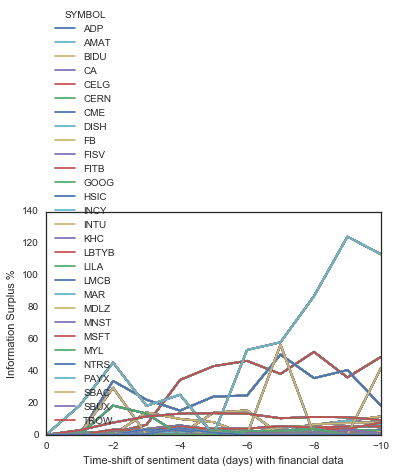

In [29]:
# def shift
data_nasdaq_top_100_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained)

In [ ]:
# def shift
data_nasdaq_top_100_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained)